In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("whitegrid")

In [13]:
class plant():
    """The plant which produces the good in question.""" 
    
    
    def __init__(self, b=100, c=-10):
        """The __init__ function takes the stable parameters b and c for later use."""
        self.b = b
        self.c = c
    
    def set_b(self, b):
        """Set fixed parameter b"""
        self.b = b
    
    def set_c(self, c):
        """Set fixed parameter c"""
        if c > 0:
            print("Warning: c should be <= 0 for the model to make sense.")
            
        self.c = c
    
    def y_return(self, x):
        """The y_return function returns the y value, that is
        the amount of produced goods."""
        return -(x**2) + self.b*x + self.c
    
    def y_exp_function(self, x, b_exp):
        """The y_exp_return fuction returns the y_exp value, that is
        the *expected* amount ofproduced goods."""
        return -(x**2) + b_exp*x
    
    def update_b_exp(self, y, x):
        """The update_b_exp function returns the updated estimation 
        of parameter b i.e. b_exp"""        
        if x != 0: #avoid division by zero
            return y/x + x
        else:
            print("Warning: Division by zero avoided in updating b")
            return y + x # Why this return value?
    
    def update_w(self, x, x_prev, surprise, w):
        """The update_w function returns the updated intrinsic utility
        for using labour for production"""    
        if x != 0: #avoid division by zero
            return (x-x_prev)/abs(x) * surprise / x + w
        else:
            print("Warning: Division by zero avoided in updating w")
            return w # return old value.
    
    def update_x(self, b_exp, w):
        """The update_x function return the amount of labour for production"""
        return (b_exp+w)/2
    
    
    def produce(self, w=0, x=20, b_exp=50, n=10, adapt=False):
        """produce returns a Pandas DataFrame documenting 
        the results of running the plant for n rounds."""
        
       # creating the pandas DataFrame, which will be returned
        index = pd.Index(range(n))
        columns = pd.Index(['w', 'x', 'y', 'y_exp', 'U', 'U_exp', 'b_exp'])
        data = pd.DataFrame(index=index, columns=columns)
        
        for t in range(n):
            # saving variables
            data['w'][t] = w
            data['x'][t] = x
            data['b_exp'][t] = b_exp
        
            # production and expected production
            data['y'][t] = self.y_return(x)
            data['y_exp'][t] = self.y_exp_function(x, b_exp)
        
            # Utility and expected utility
            data['U'][t] = data['y'][t] + w*x
            data['U_exp'][t] = data['y_exp'][t] + w*x
        
            # updating for next round
            b_exp = self.update_b_exp(data['y'][t], x)
        
            if adapt and t > 0: # w is updated only if adaptive.
                w = self.update_w(data['x'][t], data['x'][t-1],
                                  (data['U'][t] - data['U_exp'][t]), w)
            x = self.update_x(b_exp, w)
            
        # save data from last cycle
        data['w'][-1] = w
        data['x'][-1] = x
        data['b_exp'][-1] = b_exp
    
        return data
    
    def return_y(self, w=0, x=20, b_exp=50, n=50, adapt=False):
        data = self.produce(w, x, b_exp, n, adapt)
        return data['y'][n-1]

For a start, we visualize the difference between the plant without and the plant with adaptive utility using the standard values and varying only parameter c (pilferage).

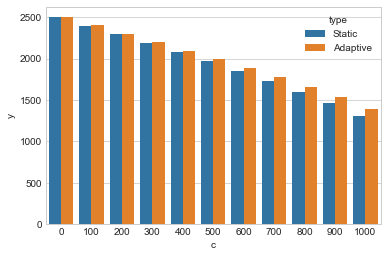

In [30]:
# creating the pandas DataFrame, which will be plotted
index = pd.Index(range(20))
columns = pd.Index(['y', 'c', 'type'])
plot_data = pd.DataFrame(index=index, columns=columns)

# creating our plant
our_plant = plant()

i = 0
for c in range(0, -1100, -100):
    our_plant.set_c(c)
        
    plot_data['c'][i] = abs(c)
    plot_data['y'][i] = our_plant.return_y()
    plot_data['type'][i] = "Static"    
    i += 1
    
    plot_data['c'][i] = abs(c)
    plot_data['y'][i] = our_plant.return_y(adapt=True)
    plot_data['type'][i] = "Adaptive"
    i += 1
    
sns.barplot(x='c', y='y', hue="type", data=plot_data)

As can be seen with the amount of pilferage the plant's output decreases, but the adaptive version does somewhat better.

In [44]:
b = 100
our_plant.set_b(b)

index = pd.Index(range(100))
columns = pd.Index(['c', 'x', 'ratio'])
plot_data = pd.DataFrame(index=index, columns=columns)

i = 0

for c_param in range(10, 110, 10):
    c = -(b**2)/c_param
    our_plant.set_c(c)
         
    for x_param in range(1, 11):
        x = b*(x_param/5)
        
        static_y = our_plant.return_y(x=x)
        adapt_y = our_plant.return_y(x=x, adapt=True)
        
        plot_data['c'][i] = c
        plot_data['x'][i] = x    
        plot_data['ratio'][i] = adapt_y / static_y
        
        i += 1


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [45]:
plot_data

c    x     ratio
0     -1000   20    1.0599
1     -1000   40   1.00212
2     -1000   60    1.0491
3     -1000   80   1.10342
4     -1000  100   1.13805
5     -1000  120   1.14474
6     -1000  140   1.12069
7     -1000  160   1.06506
8     -1000  180  0.977897
9     -1000  200  0.859566
10     -500   20   1.01349
11     -500   40   1.00031
12     -500   60   1.00251
13     -500   80   1.00858
14     -500  100   1.01373
15     -500  120   1.01608
16     -500  140   1.01475
17     -500  160   1.00928
18     -500  180  0.999448
19     -500  200  0.985108
20 -333.333   20   1.00545
21 -333.333   40   1.00024
22 -333.333   60   1.00071
23 -333.333   80    1.0029
24 -333.333  100    1.0049
25 -333.333  120   1.00593
26 -333.333  140   1.00562
27 -333.333  160   1.00379
28 -333.333  180   1.00032
29 -333.333  200  0.995132
..      ...  ...       ...
70     -125   20   1.00067
71     -125   40   1.00005
72     -125   60   1.00006
73     -125   80    1.0003
74     -125  100   1.00054
75     -125  120   1.00068
76     -125  140   1.00067
77     -125  160   1.00049
78     -125  180   1.00011
79     -125  200  0.999544
80 -111.111   20   1.00053
81 -111.111   40   1.00004
82 -111.111   60   1.00004
83 -111.111   80   1.00023
84 -111.111  100   1.00042
85 -111.111  120   1.00053
86 -111.111  140   1.00052
87 -111.111  160   1.00038
88 -111.111  180   1.00009
89 -111.111  200   0.99965
90     -100   20   1.00042
91     -100   40   1.00003
92     -100   60   1.00003
93     -100   80   1.00018
94     -100  100   1.00033
95     -100  120   1.00042
96     -100  140   1.00042
97     -100  160   1.00031
98     -100  180   1.00008
99     -100  200  0.999723

[100 rows x 3 columns]